In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import anndata as ad 
import scanpy as sc
sys.path.append("../")
import utils
from sklearn.decomposition import PCA
import umap
import graph
import visualize

In [2]:
sys.executable

'/home/bkzhu/python/miniconda3/envs/spatial_cluster/bin/python3'

# first check umaps

### just feature alone

In [66]:
df = pd.read_csv("/home/bkzhu/spatial_clustering/phase2/data/brain/processed/reg34+.csv", index_col=0)

In [67]:
df

8OHGuano  Amyloidbeta140  Amyloidbeta142  ApoE4  Calbindin  Calretinin  \
3109   0.009116        0.000000        0.076923    0.0   0.000000    0.025641   
3110   0.072926        0.000000        0.615385    0.0   0.070707    0.641026   
3111   0.063810        0.333333        0.461538    0.0   0.060606    0.076923   
3112   0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
3113   0.018232        0.000000        0.230769    0.0   0.060606    0.025641   
...         ...             ...             ...    ...        ...         ...   
10427  0.036463        0.000000        0.000000    0.0   0.000000    0.000000   
10428  0.000000        0.000000        0.000000    0.0   0.010101    0.000000   
10429  0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
10430  0.000000        0.000000        0.000000    0.0   0.000000    0.000000   
10431  0.045579        0.000000        0.000000    0.0   0.000000    0.000000   

       CD31   CD33Lyo      CD45      CD47  ...  TotalTau      VGAT    VGLUT1  \
3109   0.00  0.053333  0.000000  0.228571  ...  0.004878  0.052632  0.000000   
3110   0.00  0.026667  0.000000  0.314286  ...  0.492683  0.684211  0.041365   
3111   0.00  0.040000  0.222222  0.000000  ...  0.443902  0.210526  0.000000   
3112   0.00  0.026667  0.000000  0.142857  ...  0.121951  0.105263  0.000000   
3113   0.00  0.026667  0.000000  0.257143  ...  0.234146  0.000000  0.010341   
...     ...       ...       ...       ...  ...       ...       ...       ...   
10427  1.00  0.400000  0.000000  0.114286  ...  0.000000  0.000000  0.000000   
10428  0.00  0.000000  0.000000  0.085714  ...  0.000000  0.000000  0.568769   
10429  0.00  0.026667  0.000000  0.057143  ...  0.000000  0.052632  0.000000   
10430  0.25  0.000000  0.166667  0.171429  ...  0.009756  0.000000  0.000000   
10431  0.00  0.000000  0.277778  0.085714  ...  0.000000  0.000000  0.000000   

         VGLUT2  cellLabelInImage  PointNum    cluster.term   centroid_x  \
3109   0.021739                 1        35           Other    -6.299296   
3110   0.043478                 2        35  Astro/Dendrite   -10.795683   
3111   0.043478                 4        35  Astro/Dendrite   -25.444444   
3112   0.021739                 5        35           Other   -36.096413   
3113   0.565217                 6        35           Other   -36.135827   
...         ...               ...       ...             ...          ...   
10427  0.021739                45        85          Vessel  1130.389432   
10428  0.043478                46        85           Other  1093.889391   
10429  0.000000                47        85     Microgillia  1092.718841   
10430  0.000000                48        85     Microgillia  1090.508772   
10431  0.021739                49        85     Microgillia  1081.024263   

         centroid_y  field_of_view  
3109     793.119718              1  
3110     840.349640              1  
3111     703.646630              1  
3112     335.257848              1  
3113     750.498031              1  
...             ...            ...  
10427  17357.532290             51  
10428  17345.826185             51  
10429  17365.321739             51  
10430  17011.110276             51  
10431  17319.279029             51  

[6811 rows x 44 columns]

In [68]:
protein = df.columns[0:-6]
protein

Index(['8OHGuano', 'Amyloidbeta140', 'Amyloidbeta142', 'ApoE4', 'Calbindin',
       'Calretinin', 'CD31', 'CD33Lyo', 'CD45', 'CD47', 'CD56Lyo', 'CD105',
       'EEA1', 'GFAP', 'HistoneH3Lyo', 'Iba1', 'MAG', 'MAP2', 'MBP', 'MCT1',
       'MFN2', 'PanAmyloidbeta1724', 'PanGAD6567', 'Parvalbumin', 'PHF1Tau',
       'PolyubiK48', 'PolyubiK63', 'Presenilin1NTF', 'PSD95', 'pTDP43',
       'Reelin', 'SERT', 'Synaptophysin', 'TH', 'TotalTau', 'VGAT', 'VGLUT1',
       'VGLUT2'],
      dtype='object')

In [69]:
features = df[protein]
features

8OHGuano  Amyloidbeta140  Amyloidbeta142  ApoE4  Calbindin  Calretinin  \
3109   0.009116        0.000000        0.076923    0.0   0.000000    0.025641   
3110   0.072926        0.000000        0.615385    0.0   0.070707    0.641026   
3111   0.063810        0.333333        0.461538    0.0   0.060606    0.076923   
3112   0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
3113   0.018232        0.000000        0.230769    0.0   0.060606    0.025641   
...         ...             ...             ...    ...        ...         ...   
10427  0.036463        0.000000        0.000000    0.0   0.000000    0.000000   
10428  0.000000        0.000000        0.000000    0.0   0.010101    0.000000   
10429  0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
10430  0.000000        0.000000        0.000000    0.0   0.000000    0.000000   
10431  0.045579        0.000000        0.000000    0.0   0.000000    0.000000   

       CD31   CD33Lyo      CD45      CD47  ...     PSD95    pTDP43    Reelin  \
3109   0.00  0.053333  0.000000  0.228571  ...  0.000000  0.000000  0.222222   
3110   0.00  0.026667  0.000000  0.314286  ...  0.863636  0.230769  1.000000   
3111   0.00  0.040000  0.222222  0.000000  ...  0.090909  0.153846  0.555556   
3112   0.00  0.026667  0.000000  0.142857  ...  0.000000  0.000000  0.222222   
3113   0.00  0.026667  0.000000  0.257143  ...  0.181818  0.000000  0.000000   
...     ...       ...       ...       ...  ...       ...       ...       ...   
10427  1.00  0.400000  0.000000  0.114286  ...  0.000000  0.000000  0.000000   
10428  0.00  0.000000  0.000000  0.085714  ...  0.000000  0.461538  0.000000   
10429  0.00  0.026667  0.000000  0.057143  ...  0.000000  0.000000  0.000000   
10430  0.25  0.000000  0.166667  0.171429  ...  0.000000  0.000000  0.000000   
10431  0.00  0.000000  0.277778  0.085714  ...  0.090909  0.153846  0.000000   

           SERT  Synaptophysin        TH  TotalTau      VGAT    VGLUT1  \
3109   0.000000       0.057143  0.000000  0.004878  0.052632  0.000000   
3110   0.761905       0.285714  0.000000  0.492683  0.684211  0.041365   
3111   0.809524       0.142857  0.888889  0.443902  0.210526  0.000000   
3112   0.380952       0.114286  0.000000  0.121951  0.105263  0.000000   
3113   0.619048       0.142857  0.000000  0.234146  0.000000  0.010341   
...         ...            ...       ...       ...       ...       ...   
10427  0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   
10428  0.000000       0.000000  0.000000  0.000000  0.000000  0.568769   
10429  0.000000       0.000000  0.000000  0.000000  0.052632  0.000000   
10430  0.000000       0.057143  0.000000  0.009756  0.000000  0.000000   
10431  0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   

         VGLUT2  
3109   0.021739  
3110   0.043478  
3111   0.043478  
3112   0.021739  
3113   0.565217  
...         ...  
10427  0.021739  
10428  0.043478  
10429  0.000000  
10430  0.000000  
10431  0.021739  

[6811 rows x 38 columns]

/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/utils.py:143: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/tmp/ipykernel_22654/3843792555.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  gnn_adata = ad.AnnData((features))
/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


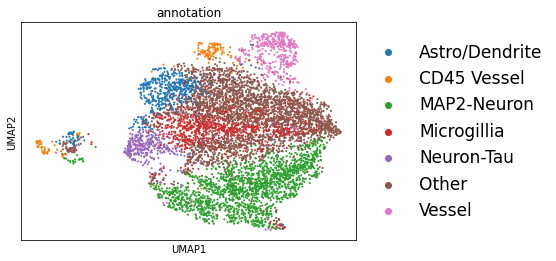

In [7]:
import anndata as ad
import scanpy as sc

gnn_adata = ad.AnnData((features))
sc.pp.scale(gnn_adata)
sc.pp.neighbors(gnn_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(gnn_adata)
gnn_adata.obs['annotation'] = list(df['cluster.term'])
sc.pl.umap(gnn_adata, color='annotation', legend_fontsize=17, show=False)

### vanilla gnn

In [8]:
gnn_embeddings = np.load("/home/bkzhu/spatial_clustering/phase2/data/brain/results/vanila_gnn_embeddings.npy")
gnn_embeddings.shape

(6811, 28)

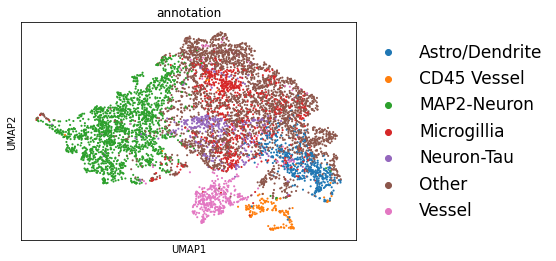

In [9]:
gnn_adata = ad.AnnData(gnn_embeddings)
sc.pp.scale(gnn_adata)
sc.pp.neighbors(gnn_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(gnn_adata)
gnn_adata.obs['annotation'] = list(df['cluster.term'])
sc.pl.umap(gnn_adata, color='annotation', legend_fontsize=17, show=False)

### convgnn

In [3]:
convgnn_embed = np.load('/home/bkzhu/spatial_clustering/phase2/data/brain/results/conv_gnn_embeddings_img16.npy')
convgnn_embed.shape

(6811, 30)

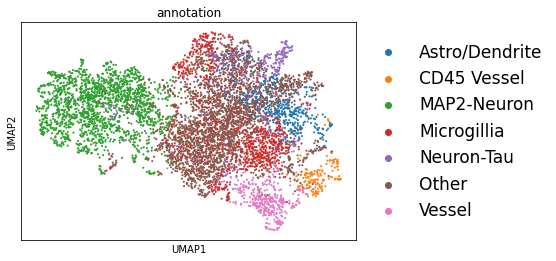

In [11]:
gnn_adata = ad.AnnData(convgnn_embed)
sc.pp.scale(gnn_adata)
sc.pp.neighbors(gnn_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(gnn_adata)
gnn_adata.obs['annotation'] = list(df['cluster.term'])
sc.pl.umap(gnn_adata, color='annotation', legend_fontsize=17, show=False)

### conv image only

In [ ]:
convimg_embed = np.load('/home/bkzhu/spatial_clustering/phase2/data/brain/results/conv_gnn_img_embeddings_img16.npy')
convimg_embed.shape

In [ ]:
gnn_adata = ad.AnnData(convimg_embed)
sc.pp.scale(gnn_adata)
sc.pp.neighbors(gnn_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(gnn_adata)
gnn_adata.obs['annotation'] = list(df['cluster.term'])
sc.pl.umap(gnn_adata, color='annotation', legend_fontsize=17, show=False)

# now we need to run clustering on vanila features or convGNN features

In [12]:
# clustering on vanila feature graphs

feature_edges = graph.get_feature_edges(
        arr=features.to_numpy(), pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
feature_labels = graph.graph_clustering(
        features.shape[0], feature_edges, resolution=None, n_clusters=20, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )

In [14]:
# do this again on vanilla gnn features

feature_edges_gnn = graph.get_feature_edges(
        arr=gnn_embeddings, pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
feature_labels_gnn = graph.graph_clustering(
        gnn_embeddings.shape[0], feature_edges_gnn, resolution=None, n_clusters=20, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )

In [15]:
# do this again on convGNN features

feature_edges_conv = graph.get_feature_edges(
        arr=convgnn_embed, pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
feature_labels_conv = graph.graph_clustering(
        convgnn_embed.shape[0], feature_edges_conv, resolution=None, n_clusters=20, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )

In [16]:
unique, counts = np.unique(feature_labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  0 762]
 [  1 721]
 [  2 567]
 [  3 473]
 [  4 423]
 [  5 396]
 [  6 392]
 [  7 361]
 [  8 329]
 [  9 315]
 [ 10 308]
 [ 11 303]
 [ 12 294]
 [ 13 270]
 [ 14 225]
 [ 15 212]
 [ 16 172]
 [ 17 156]
 [ 18  84]
 [ 19  48]]


In [17]:
unique, counts = np.unique(feature_labels_gnn, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  0 811]
 [  1 800]
 [  2 601]
 [  3 596]
 [  4 501]
 [  5 405]
 [  6 372]
 [  7 357]
 [  8 343]
 [  9 335]
 [ 10 304]
 [ 11 272]
 [ 12 207]
 [ 13 199]
 [ 14 171]
 [ 15 164]
 [ 16 157]
 [ 17 139]
 [ 18  55]
 [ 19  22]]


In [18]:
unique, counts = np.unique(feature_labels_conv, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  0 747]
 [  1 692]
 [  2 661]
 [  3 599]
 [  4 573]
 [  5 484]
 [  6 415]
 [  7 372]
 [  8 345]
 [  9 303]
 [ 10 303]
 [ 11 276]
 [ 12 213]
 [ 13 186]
 [ 14 185]
 [ 15 168]
 [ 16 154]
 [ 17  57]
 [ 18  49]
 [ 19  29]]


/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/utils.py:143: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/tmp/ipykernel_22654/1230999715.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  feature_adata = ad.AnnData((features))
/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


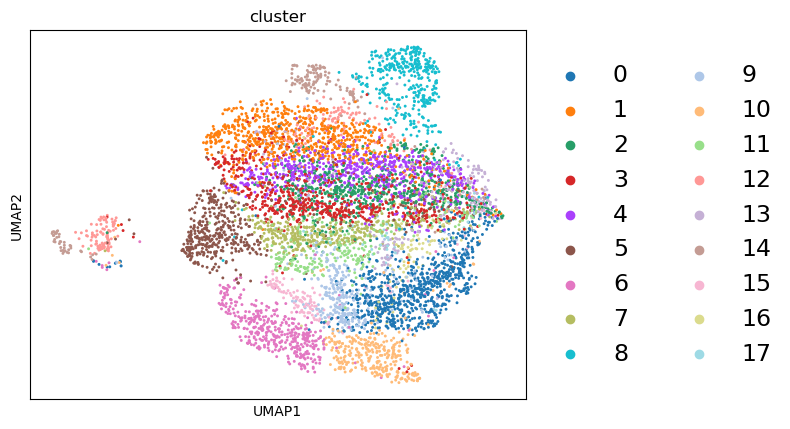

In [89]:
plt.rcParams.update(plt.rcParamsDefault)
feature_adata = ad.AnnData((features))
sc.pp.scale(feature_adata)
sc.pp.neighbors(feature_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(feature_adata)
feature_adata.obs['cluster'] = [str(x) for x in feature_labels]
sc.pl.umap(feature_adata, color='cluster', legend_fontsize=17, show=False)

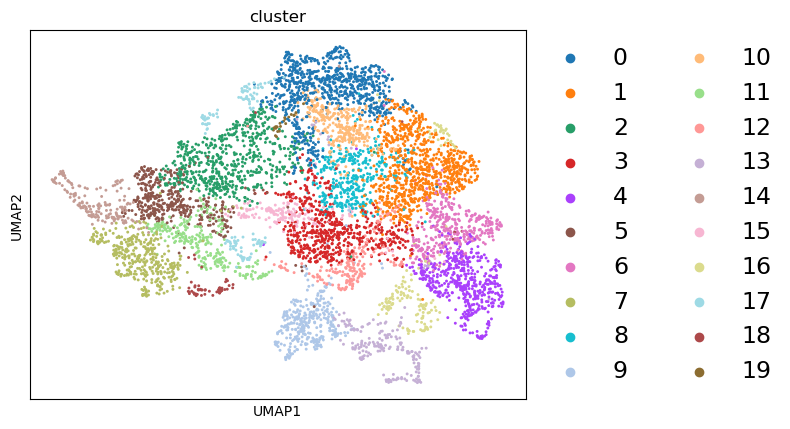

In [56]:
vgnn_adata = ad.AnnData(gnn_embeddings)
sc.pp.scale(vgnn_adata)
sc.pp.neighbors(vgnn_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(vgnn_adata)
vgnn_adata.obs['cluster'] = [str(x) for x in feature_labels_gnn]
sc.pl.umap(vgnn_adata, color='cluster', legend_fontsize=17, show=False)

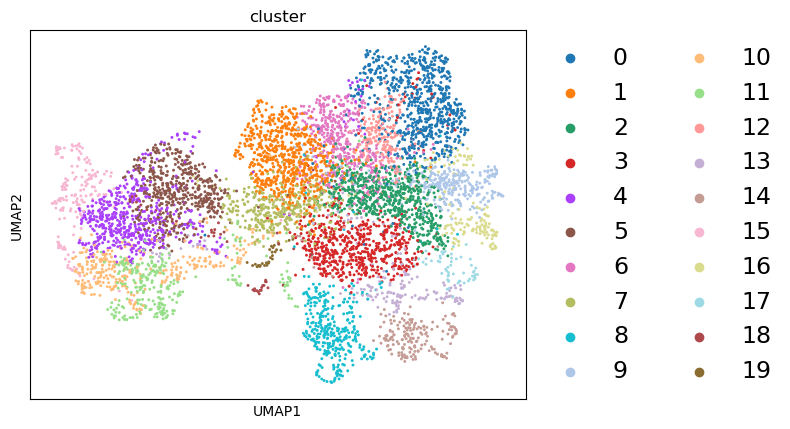

In [57]:
convgnn_adata = ad.AnnData(convgnn_embed)
sc.pp.scale(convgnn_adata)
sc.pp.neighbors(convgnn_adata, n_neighbors=10, use_rep='X')
sc.tl.umap(convgnn_adata)
convgnn_adata.obs['cluster'] = [str(x) for x in feature_labels_conv]
sc.pl.umap(convgnn_adata, color='cluster', legend_fontsize=17, show=False)

In [52]:
gnn_adata.obsm['X_umap'].shape

(6811, 2)

# now we check heatmap

In [26]:
features['label1'] = list(map(str, feature_labels))
features['label2'] = list(map(str, feature_labels_conv))
features['label3'] = list(map(str, feature_labels_gnn))

/tmp/ipykernel_22654/2120677287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label1'] = list(map(str, feature_labels))
/tmp/ipykernel_22654/2120677287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label2'] = list(map(str, feature_labels_conv))
/tmp/ipykernel_22654/2120677287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [27]:
features

8OHGuano  Amyloidbeta140  Amyloidbeta142  ApoE4  Calbindin  Calretinin  \
3109   0.009116        0.000000        0.076923    0.0   0.000000    0.025641   
3110   0.072926        0.000000        0.615385    0.0   0.070707    0.641026   
3111   0.063810        0.333333        0.461538    0.0   0.060606    0.076923   
3112   0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
3113   0.018232        0.000000        0.230769    0.0   0.060606    0.025641   
...         ...             ...             ...    ...        ...         ...   
10427  0.036463        0.000000        0.000000    0.0   0.000000    0.000000   
10428  0.000000        0.000000        0.000000    0.0   0.010101    0.000000   
10429  0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
10430  0.000000        0.000000        0.000000    0.0   0.000000    0.000000   
10431  0.045579        0.000000        0.000000    0.0   0.000000    0.000000   

       CD31   CD33Lyo      CD45      CD47  ...      SERT  Synaptophysin  \
3109   0.00  0.053333  0.000000  0.228571  ...  0.000000       0.057143   
3110   0.00  0.026667  0.000000  0.314286  ...  0.761905       0.285714   
3111   0.00  0.040000  0.222222  0.000000  ...  0.809524       0.142857   
3112   0.00  0.026667  0.000000  0.142857  ...  0.380952       0.114286   
3113   0.00  0.026667  0.000000  0.257143  ...  0.619048       0.142857   
...     ...       ...       ...       ...  ...       ...            ...   
10427  1.00  0.400000  0.000000  0.114286  ...  0.000000       0.000000   
10428  0.00  0.000000  0.000000  0.085714  ...  0.000000       0.000000   
10429  0.00  0.026667  0.000000  0.057143  ...  0.000000       0.000000   
10430  0.25  0.000000  0.166667  0.171429  ...  0.000000       0.057143   
10431  0.00  0.000000  0.277778  0.085714  ...  0.000000       0.000000   

             TH  TotalTau      VGAT    VGLUT1    VGLUT2  label1  label2  \
3109   0.000000  0.004878  0.052632  0.000000  0.021739       7       9   
3110   0.000000  0.492683  0.684211  0.041365  0.043478       1       2   
3111   0.888889  0.443902  0.210526  0.000000  0.043478       9       3   
3112   0.000000  0.121951  0.105263  0.000000  0.021739       1       9   
3113   0.000000  0.234146  0.000000  0.010341  0.565217       1       2   
...         ...       ...       ...       ...       ...     ...     ...   
10427  0.000000  0.000000  0.000000  0.000000  0.021739       6       8   
10428  0.000000  0.000000  0.000000  0.568769  0.043478       5       1   
10429  0.000000  0.000000  0.052632  0.000000  0.000000       2       3   
10430  0.000000  0.009756  0.000000  0.000000  0.000000       2       1   
10431  0.000000  0.000000  0.000000  0.000000  0.021739       2       3   

       label3  
3109        6  
3110        4  
3111        4  
3112        6  
3113        6  
...       ...  
10427       9  
10428       0  
10429      10  
10430      10  
10431      10  

[6811 rows x 41 columns]

## feature only

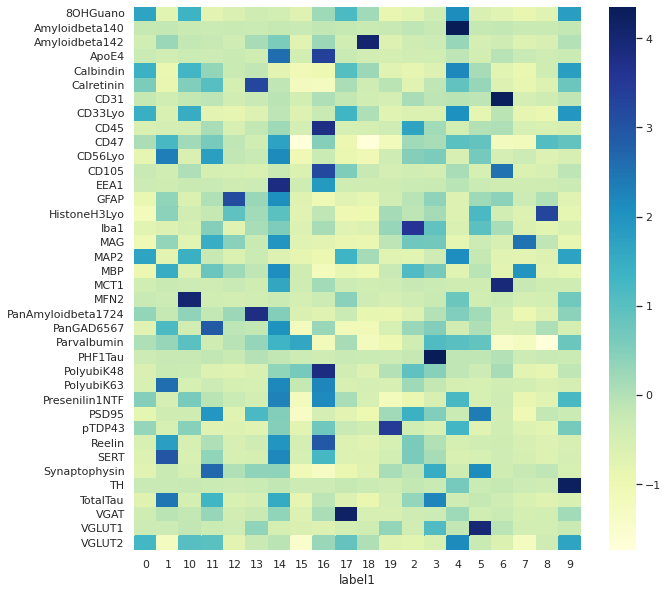

In [28]:
from scipy import stats
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

tmp = features.groupby(by='label1').mean()
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu",xticklabels=True, yticklabels=True)

## vanilla gnn

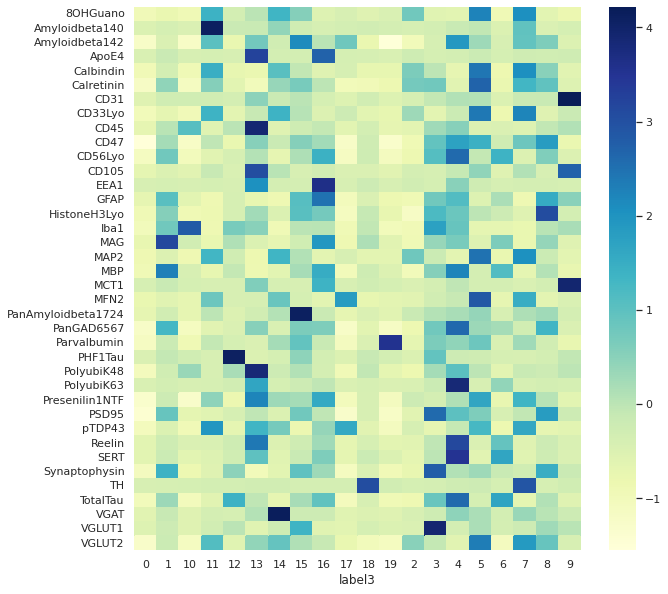

In [29]:
from scipy import stats
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

tmp = features.groupby(by='label3').mean()
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu",xticklabels=True, yticklabels=True)

## conv GNN

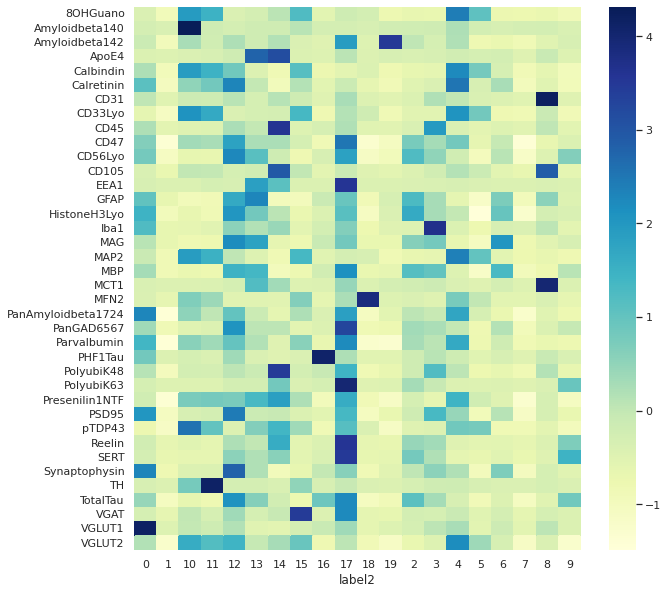

In [30]:
tmp = features.groupby(by='label2').mean()
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu",xticklabels=True, yticklabels=True)

## check morphology

In [31]:
images = np.load('/home/bkzhu/spatial_clustering/phase2/data/brain/processed/images_pad.npy')

In [32]:
np.unique(df['cluster.term'])

array(['Astro/Dendrite', 'CD45 Vessel', 'MAP2-Neuron', 'Microgillia',
       'Neuron-Tau', 'Other', 'Vessel'], dtype=object)

### check some cluster1

<Figure size 1800x400 with 0 Axes>

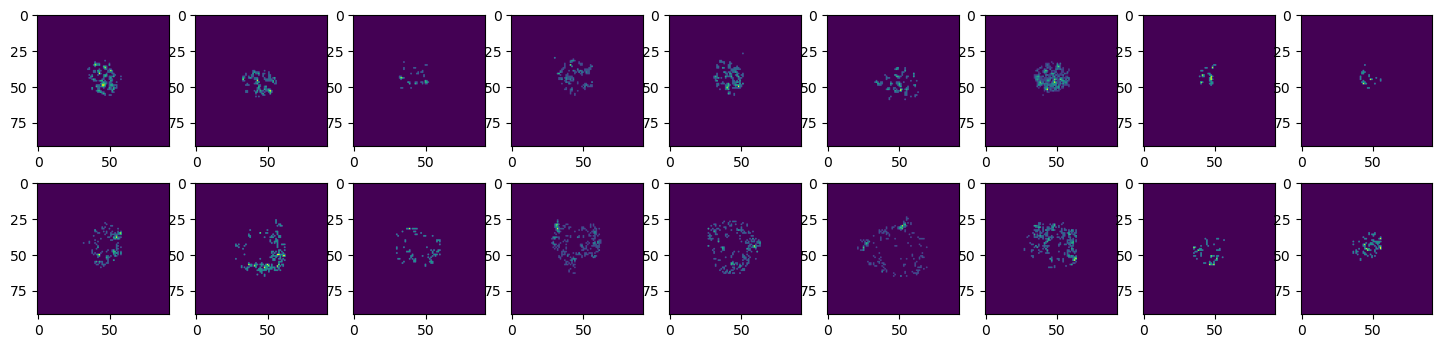

In [34]:
plt.rcParams.update(plt.rcParamsDefault)

idx = np.random.choice(np.nonzero((df['cluster.term'] == 'MAP2-Neuron').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

<Figure size 1800x400 with 0 Axes>

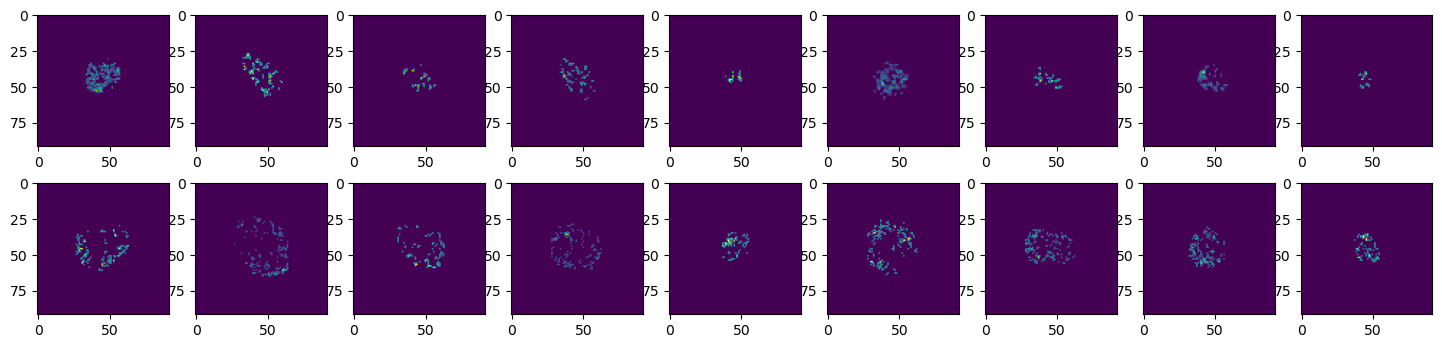

In [35]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'MAP2-Neuron').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

### check some other clusters

<Figure size 1800x400 with 0 Axes>

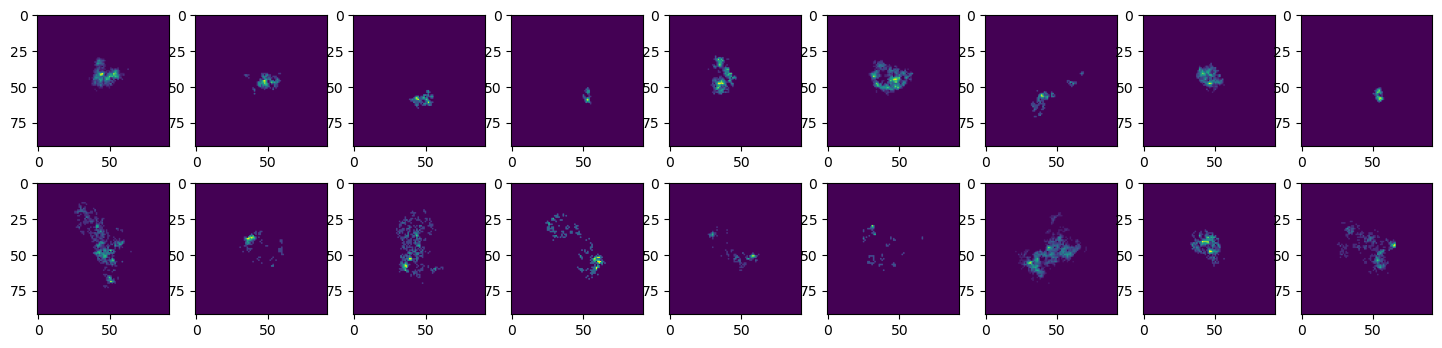

In [36]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'Astro/Dendrite').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

<Figure size 1800x400 with 0 Axes>

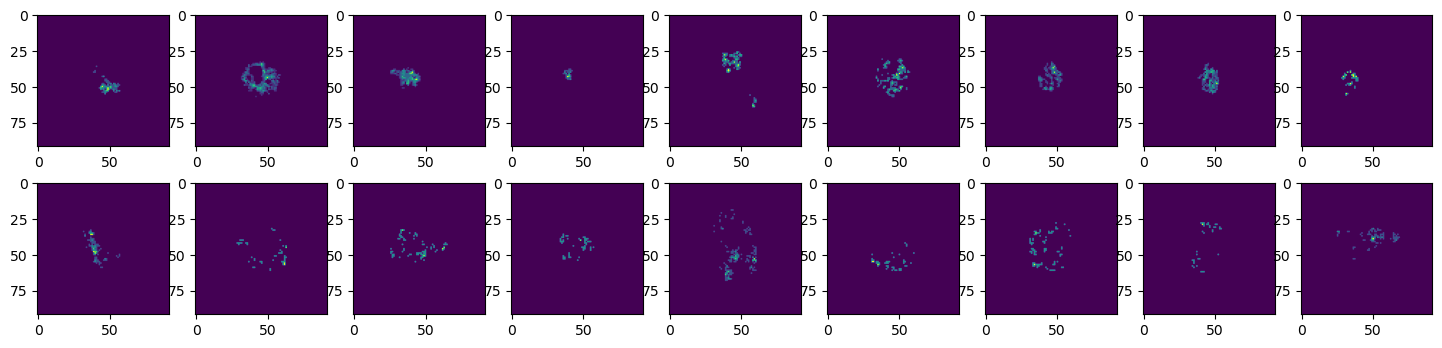

In [37]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'Astro/Dendrite').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

<Figure size 1800x400 with 0 Axes>

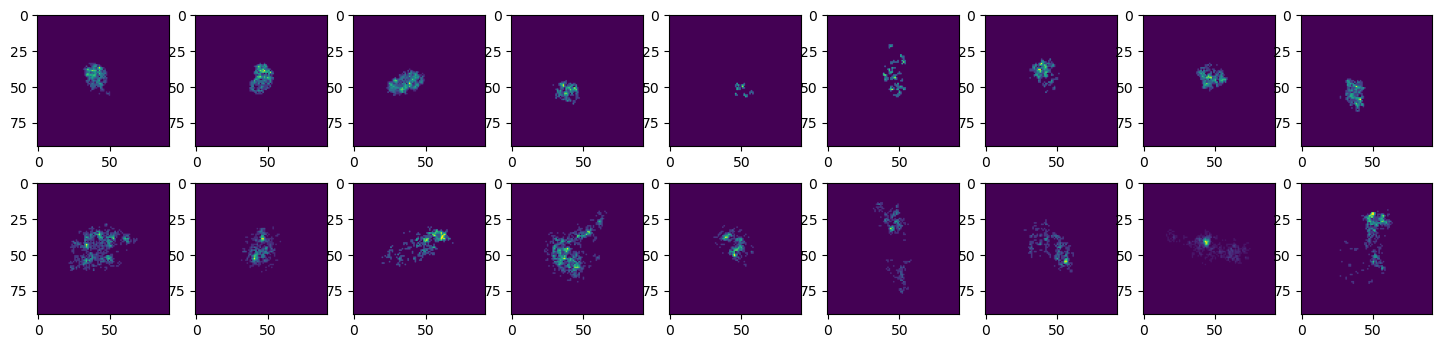

In [38]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'Microgillia').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

<Figure size 1800x400 with 0 Axes>

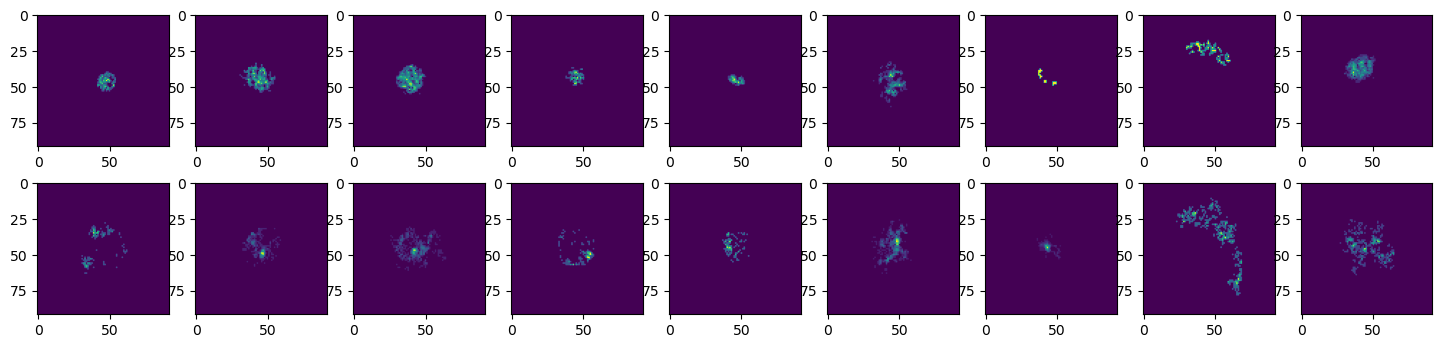

In [39]:
idx = np.random.choice(np.nonzero((df['cluster.term'] == 'Microgillia').to_numpy())[0], 9, replace=False)

plt.rcParams["figure.figsize"] = (18, 4)
#idx = np.random.choice(np.nonzero((cnn_8d_adata_b.obs['leiden'] == '6').to_numpy())[0], 9, replace=False)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,9) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
target = 11
axarr[0,0].imshow(images[idx[0], 0, :, :])
axarr[0,1].imshow(images[idx[1], 0, :, :])
axarr[0,2].imshow(images[idx[2], 0, :, :])
axarr[0,3].imshow(images[idx[3], 0, :, :])
axarr[0,4].imshow(images[idx[4], 0, :, :])
axarr[0,5].imshow(images[idx[5], 0, :, :])
axarr[0,6].imshow(images[idx[6], 0, :, :])
axarr[0,7].imshow(images[idx[7], 0, :, :])
axarr[0,8].imshow(images[idx[8], 0, :, :])

axarr[1,0].imshow(images[idx[0], 1, :, :])
axarr[1,1].imshow(images[idx[1], 1, :, :])
axarr[1,2].imshow(images[idx[2], 1, :, :])
axarr[1,3].imshow(images[idx[3], 1, :, :])
axarr[1,4].imshow(images[idx[4], 1, :, :])
axarr[1,5].imshow(images[idx[5], 1, :, :])
axarr[1,6].imshow(images[idx[6], 1, :, :])
axarr[1,7].imshow(images[idx[7], 1, :, :])
axarr[1,8].imshow(images[idx[8], 1, :, :])

#plt.colorbar()

In [40]:
df_full = df

In [41]:
#pd.options.mode.chained_assignment = None  # default='warn'
df_full_noMix = df_full[df_full['cluster.term'] != 'mix']
df_full_noMix50k = df_full_noMix.iloc[0:50000,]

df_full_noMix50k.loc[:,'convgnn'] = list(map(str, feature_labels_conv))
df_full_noMix50k.loc[:,'vngnn'] = list(map(str, feature_labels_gnn))
df_full_noMix50k.loc[:,'feature'] = list(map(str, feature_labels))

df_full_noMix50k.loc[:,'x'] = df.loc[:,'centroid_x'].tolist()
df_full_noMix50k.loc[:,'y'] = df.loc[:,'centroid_y'].tolist()
df_full_noMix50k

/tmp/ipykernel_22654/1267853927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_noMix50k.loc[:,'convgnn'] = list(map(str, feature_labels_conv))
/tmp/ipykernel_22654/1267853927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_noMix50k.loc[:,'vngnn'] = list(map(str, feature_labels_gnn))
/tmp/ipykernel_22654/1267853927.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

8OHGuano  Amyloidbeta140  Amyloidbeta142  ApoE4  Calbindin  Calretinin  \
3109   0.009116        0.000000        0.076923    0.0   0.000000    0.025641   
3110   0.072926        0.000000        0.615385    0.0   0.070707    0.641026   
3111   0.063810        0.333333        0.461538    0.0   0.060606    0.076923   
3112   0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
3113   0.018232        0.000000        0.230769    0.0   0.060606    0.025641   
...         ...             ...             ...    ...        ...         ...   
10427  0.036463        0.000000        0.000000    0.0   0.000000    0.000000   
10428  0.000000        0.000000        0.000000    0.0   0.010101    0.000000   
10429  0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
10430  0.000000        0.000000        0.000000    0.0   0.000000    0.000000   
10431  0.045579        0.000000        0.000000    0.0   0.000000    0.000000   

       CD31   CD33Lyo      CD45      CD47  ...  PointNum    cluster.term  \
3109   0.00  0.053333  0.000000  0.228571  ...        35           Other   
3110   0.00  0.026667  0.000000  0.314286  ...        35  Astro/Dendrite   
3111   0.00  0.040000  0.222222  0.000000  ...        35  Astro/Dendrite   
3112   0.00  0.026667  0.000000  0.142857  ...        35           Other   
3113   0.00  0.026667  0.000000  0.257143  ...        35           Other   
...     ...       ...       ...       ...  ...       ...             ...   
10427  1.00  0.400000  0.000000  0.114286  ...        85          Vessel   
10428  0.00  0.000000  0.000000  0.085714  ...        85           Other   
10429  0.00  0.026667  0.000000  0.057143  ...        85     Microgillia   
10430  0.25  0.000000  0.166667  0.171429  ...        85     Microgillia   
10431  0.00  0.000000  0.277778  0.085714  ...        85     Microgillia   

        centroid_x    centroid_y  field_of_view  convgnn  vngnn  feature  \
3109     -6.299296    793.119718              1        9      6        7   
3110    -10.795683    840.349640              1        2      4        1   
3111    -25.444444    703.646630              1        3      4        9   
3112    -36.096413    335.257848              1        9      6        1   
3113    -36.135827    750.498031              1        2      6        1   
...            ...           ...            ...      ...    ...      ...   
10427  1130.389432  17357.532290             51        8      9        6   
10428  1093.889391  17345.826185             51        1      0        5   
10429  1092.718841  17365.321739             51        3     10        2   
10430  1090.508772  17011.110276             51        1     10        2   
10431  1081.024263  17319.279029             51        3     10        2   

                 x             y  
3109     -6.299296    793.119718  
3110    -10.795683    840.349640  
3111    -25.444444    703.646630  
3112    -36.096413    335.257848  
3113    -36.135827    750.498031  
...            ...           ...  
10427  1130.389432  17357.532290  
10428  1093.889391  17345.826185  
10429  1092.718841  17365.321739  
10430  1090.508772  17011.110276  
10431  1081.024263  17319.279029  

[6811 rows x 49 columns]

## convgnn

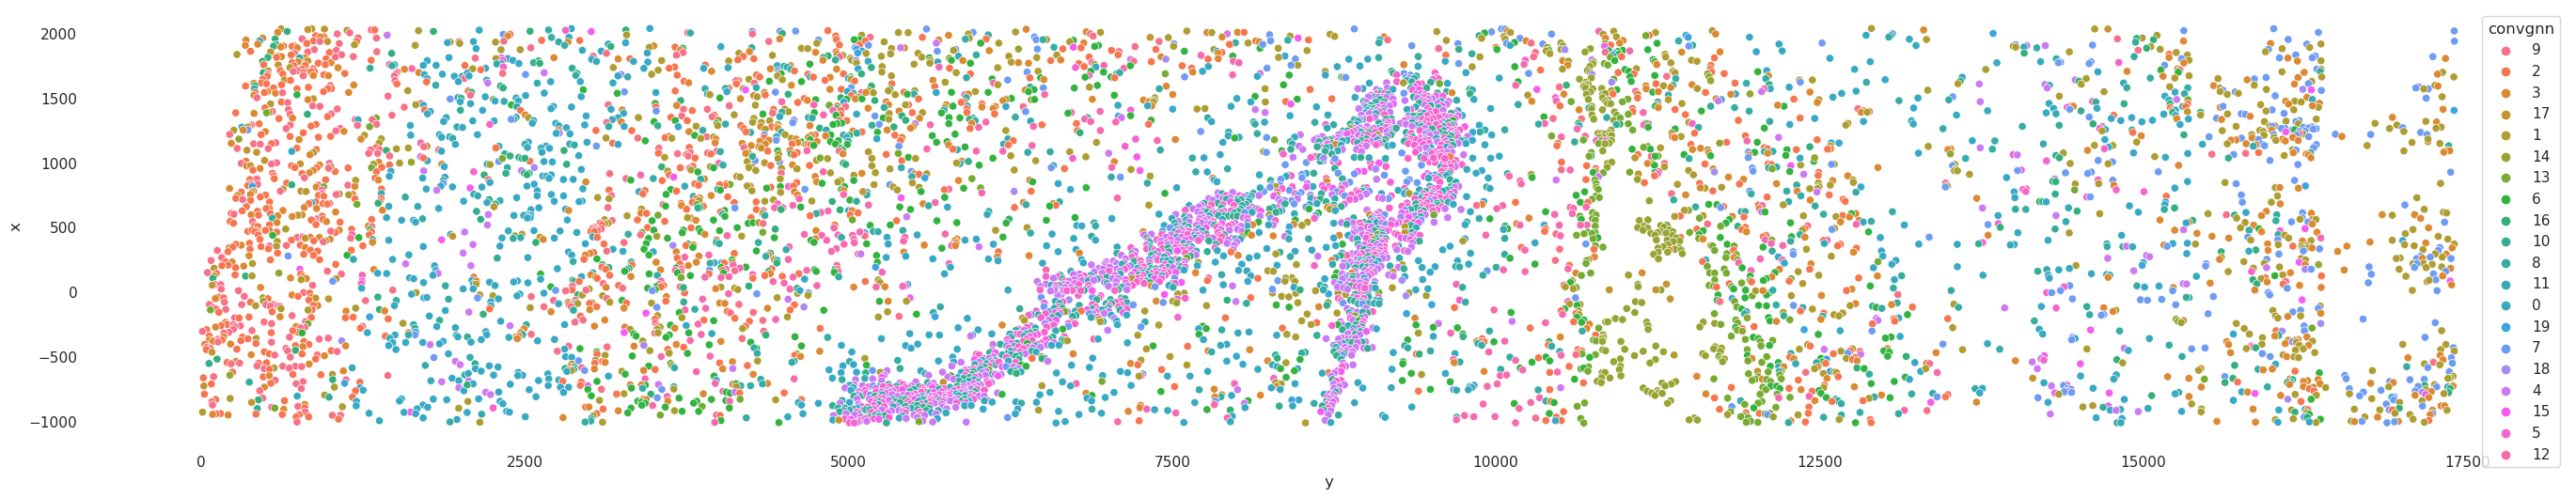

In [45]:
sns.set(rc={'figure.figsize':(34,6)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k, x="y", y="x", hue="convgnn",legend="full"
)

## vgnn

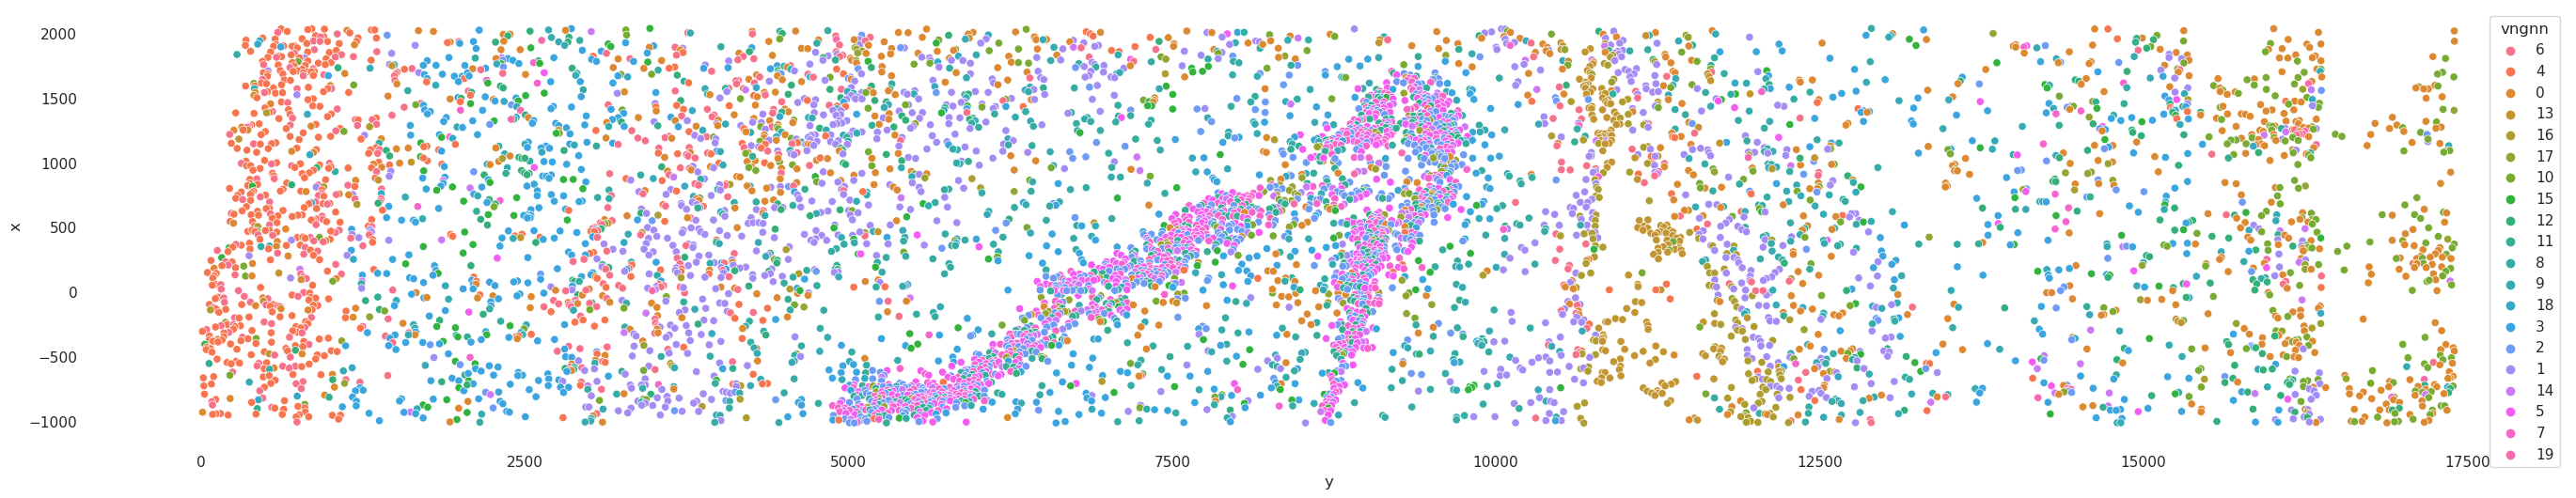

In [46]:
sns.set(rc={'figure.figsize':(34,6)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k, x="y", y="x", hue="vngnn",legend="full"
)

## feature

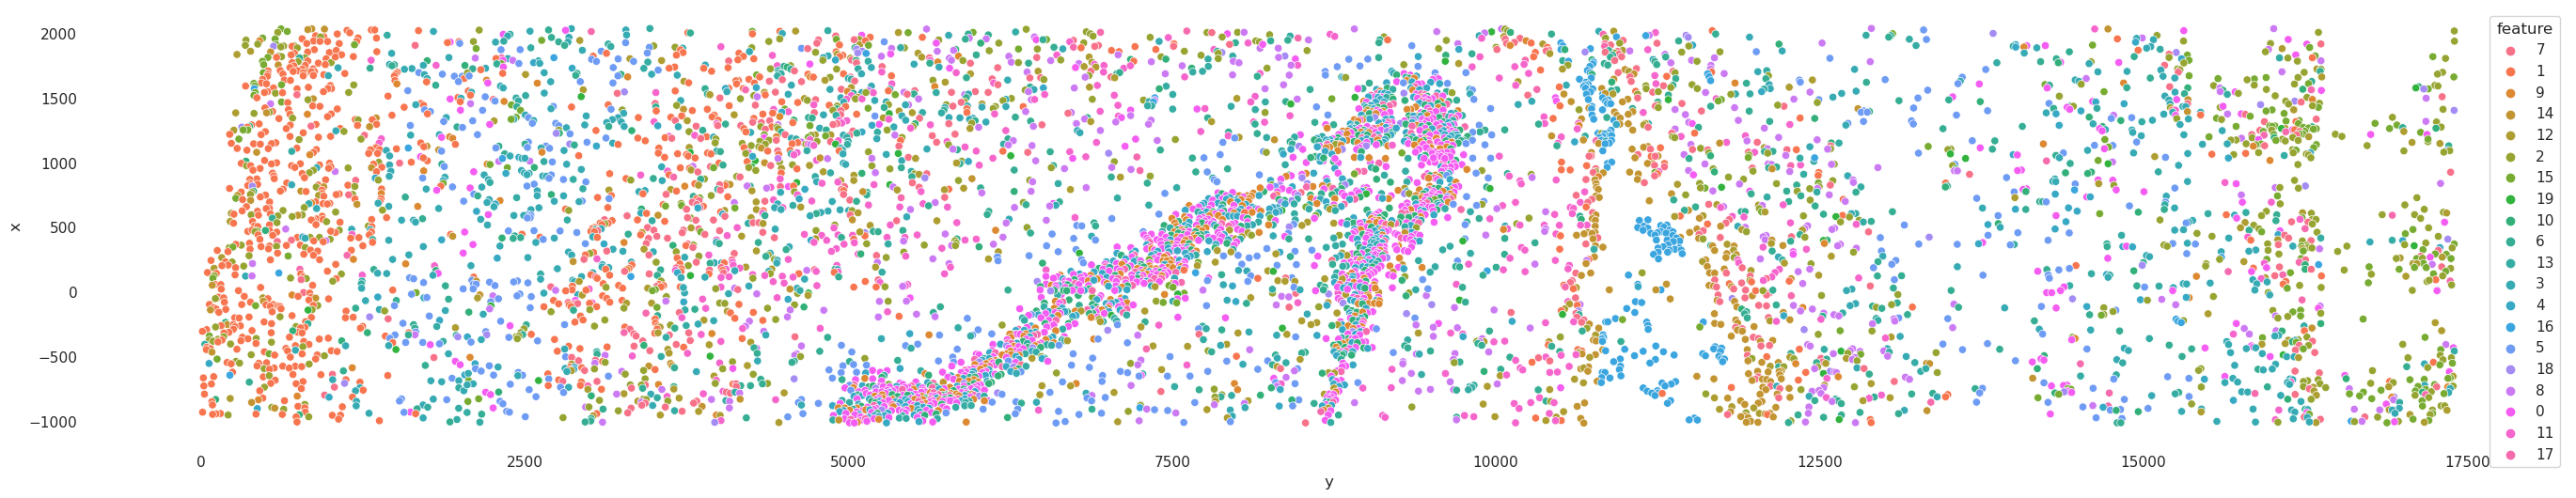

In [47]:
sns.set(rc={'figure.figsize':(34,6)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.scatterplot(
    data=df_full_noMix50k, x="y", y="x", hue="feature",legend="full"
)

In [59]:
import sklearn.metrics
feature_ss = sklearn.metrics.silhouette_score(feature_adata.obsm['X_umap'], feature_labels)
gnn_ss = sklearn.metrics.silhouette_score(vgnn_adata.obsm['X_umap'], feature_labels_gnn)
covgnn_ss = sklearn.metrics.silhouette_score(convgnn_adata.obsm['X_umap'], feature_labels_conv)
print((feature_ss,gnn_ss,covgnn_ss))

(0.13409418, 0.15143716, 0.11210951)


In [70]:
features = df[protein]
features

8OHGuano  Amyloidbeta140  Amyloidbeta142  ApoE4  Calbindin  Calretinin  \
3109   0.009116        0.000000        0.076923    0.0   0.000000    0.025641   
3110   0.072926        0.000000        0.615385    0.0   0.070707    0.641026   
3111   0.063810        0.333333        0.461538    0.0   0.060606    0.076923   
3112   0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
3113   0.018232        0.000000        0.230769    0.0   0.060606    0.025641   
...         ...             ...             ...    ...        ...         ...   
10427  0.036463        0.000000        0.000000    0.0   0.000000    0.000000   
10428  0.000000        0.000000        0.000000    0.0   0.010101    0.000000   
10429  0.009116        0.000000        0.000000    0.0   0.000000    0.000000   
10430  0.000000        0.000000        0.000000    0.0   0.000000    0.000000   
10431  0.045579        0.000000        0.000000    0.0   0.000000    0.000000   

       CD31   CD33Lyo      CD45      CD47  ...     PSD95    pTDP43    Reelin  \
3109   0.00  0.053333  0.000000  0.228571  ...  0.000000  0.000000  0.222222   
3110   0.00  0.026667  0.000000  0.314286  ...  0.863636  0.230769  1.000000   
3111   0.00  0.040000  0.222222  0.000000  ...  0.090909  0.153846  0.555556   
3112   0.00  0.026667  0.000000  0.142857  ...  0.000000  0.000000  0.222222   
3113   0.00  0.026667  0.000000  0.257143  ...  0.181818  0.000000  0.000000   
...     ...       ...       ...       ...  ...       ...       ...       ...   
10427  1.00  0.400000  0.000000  0.114286  ...  0.000000  0.000000  0.000000   
10428  0.00  0.000000  0.000000  0.085714  ...  0.000000  0.461538  0.000000   
10429  0.00  0.026667  0.000000  0.057143  ...  0.000000  0.000000  0.000000   
10430  0.25  0.000000  0.166667  0.171429  ...  0.000000  0.000000  0.000000   
10431  0.00  0.000000  0.277778  0.085714  ...  0.090909  0.153846  0.000000   

           SERT  Synaptophysin        TH  TotalTau      VGAT    VGLUT1  \
3109   0.000000       0.057143  0.000000  0.004878  0.052632  0.000000   
3110   0.761905       0.285714  0.000000  0.492683  0.684211  0.041365   
3111   0.809524       0.142857  0.888889  0.443902  0.210526  0.000000   
3112   0.380952       0.114286  0.000000  0.121951  0.105263  0.000000   
3113   0.619048       0.142857  0.000000  0.234146  0.000000  0.010341   
...         ...            ...       ...       ...       ...       ...   
10427  0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   
10428  0.000000       0.000000  0.000000  0.000000  0.000000  0.568769   
10429  0.000000       0.000000  0.000000  0.000000  0.052632  0.000000   
10430  0.000000       0.057143  0.000000  0.009756  0.000000  0.000000   
10431  0.000000       0.000000  0.000000  0.000000  0.000000  0.000000   

         VGLUT2  
3109   0.021739  
3110   0.043478  
3111   0.043478  
3112   0.021739  
3113   0.565217  
...         ...  
10427  0.021739  
10428  0.043478  
10429  0.000000  
10430  0.000000  
10431  0.021739  

[6811 rows x 38 columns]

In [76]:
feature_ss_list = []
gnn_ss_list = []
covgnn_ss_list = []
k_clusters = [x for x in range(6,20,2)]

for k in k_clusters:
    
    ## feature only
    feature_edges = graph.get_feature_edges(
        arr=features.to_numpy(), pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
    feature_labels = graph.graph_clustering(
        features.shape[0], feature_edges, resolution=None, n_clusters=k, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )
    
    ## gnn only
    feature_edges_gnn = graph.get_feature_edges(
        arr=gnn_embeddings, pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
    feature_labels_gnn = graph.graph_clustering(
        gnn_embeddings.shape[0], feature_edges_gnn, resolution=None, n_clusters=k, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )
    
    ## convGNN 
    feature_edges_conv = graph.get_feature_edges(
        arr=convgnn_embed, pca_components=None,
        n_neighbors=15, metric='correlation', verbose=False
    )
    feature_labels_conv = graph.graph_clustering(
        convgnn_embed.shape[0], feature_edges_conv, resolution=None, n_clusters=k, n_runs=1,
        resolution_tol=0.05, seed=None, verbose=False
    )
    
    feature_ss = sklearn.metrics.silhouette_score(feature_adata.obsm['X_umap'], feature_labels)
    gnn_ss = sklearn.metrics.silhouette_score(vgnn_adata.obsm['X_umap'], feature_labels_gnn)
    covgnn_ss = sklearn.metrics.silhouette_score(convgnn_adata.obsm['X_umap'], feature_labels_conv)
    
    feature_ss_list.append(feature_ss)
    gnn_ss_list.append(gnn_ss)
    covgnn_ss_list.append(covgnn_ss)
    
    

In [77]:
k_clusters

[6, 8, 10, 12, 14, 16, 18]

In [78]:
feature_ss_list

[0.1210359,
 0.12594935,
 0.092846334,
 0.096941695,
 0.1407381,
 0.10369163,
 0.13959263]

In [79]:
gnn_ss_list

[0.39567965,
 0.24525136,
 0.23466204,
 0.20346089,
 0.16803424,
 0.17692915,
 0.15082678]

In [80]:
covgnn_ss_list

[0.1694931,
 0.068984784,
 0.20000742,
 0.202765,
 0.19593702,
 0.18343118,
 0.13396603]

## test modularity

In [81]:
import leidenalg
import igraph as ig

def get_modularity(n,edges, seed = 42, resolution = 1):
    
    g = ig.Graph(directed=True)
    g.add_vertices(n)
    g.add_edges(list(zip(edges[0], edges[1])))
    g.es['weight'] = tuple(edges[2])
    partition_kwargs = {'n_iterations': -1, 'seed': seed,
                    'resolution_parameter': resolution}
    partition_kwargs['weights'] = np.array(g.es['weight']).astype(np.float64)
    partition_type = leidenalg.RBConfigurationVertexPartition
    curr_part = leidenalg.find_partition(
                graph=g, partition_type=partition_type,
                **partition_kwargs
            )
    curr_modularity = curr_part.modularity
    
    return curr_modularity

In [88]:
res = 0.2
a = get_modularity(convgnn_embed.shape[0], feature_edges_conv, resolution = res)
b = get_modularity(gnn_embeddings.shape[0], feature_edges_gnn, resolution = res)
c = get_modularity(features.shape[0], feature_edges, resolution = res)

print((a,b,c))

(0.6310536587465982, 0.7810854338534848, 0.5425037886352136)


In [84]:
res = 0.5
a = get_modularity(convgnn_embed.shape[0], feature_edges_conv, resolution = res)
b = get_modularity(gnn_embeddings.shape[0], feature_edges_gnn, resolution = res)
c = get_modularity(features.shape[0], feature_edges, resolution = res)

print((a,b,c))

(0.7473003965879415, 0.8102183691850311, 0.738354463360828)


In [85]:
res = 1
a = get_modularity(convgnn_embed.shape[0], feature_edges_conv, resolution = res)
b = get_modularity(gnn_embeddings.shape[0], feature_edges_gnn, resolution = res)
c = get_modularity(features.shape[0], feature_edges, resolution = res)

print((a,b,c))

(0.7472407909674433, 0.8112575053109172, 0.7421888704790588)


In [86]:
res = 1.5
a = get_modularity(convgnn_embed.shape[0], feature_edges_conv, resolution = res)
b = get_modularity(gnn_embeddings.shape[0], feature_edges_gnn, resolution = res)
c = get_modularity(features.shape[0], feature_edges, resolution = res)

print((a,b,c))

(0.733663858712712, 0.8041617187657872, 0.7352730764601776)
